#Data Exploration of Housing Market in Milan
##**Title**: COVID-19: Continents in relation to time
##**Origin**: https://www.kaggle.com/code/michau96/covid-19-continents-in-relation-to-time/input



In [128]:
pip install opendatasets

In [129]:
import opendatasets as od
import statistics as stat
import pandas as pd
import bokeh as bk
import seaborn as sns
import matplotlib.pyplot as mplt
import math

In [130]:
od.download("https://www.kaggle.com/datasets/tommasoramella/milano-housing-price/download?datasetVersionNumber=14")

Skipping, found downloaded files in "./milano-housing-price" (use force=True to force download)


In [131]:
data = pd.read_excel("/content/milano-housing-price/milano_housing_02_2_23.xlsx")

In [132]:
data.head()

,index,rooms,m2,bathrooms,floor,condominium_expenses,date,contract,typology,total_floors,...,energy_certification,co2_emissions,elevator,floor_level,heating_centralized,heating_radiator,heating_gas,air_conditiong_centralized,air_conditioning_heat,renewable_energy_performance_index_KWh/m2
0,0,3,140.0,2,4,535,08/02/2023,sale,apartment | entire property | stately property...,6 floors,...,NaN,NaN,1,4,centralized,to radiators,methane powered,autonomous,cold/hot,NaN
1,0,4,121.0,2,3,200,17/02/2023,sale,apartment | entire property | stately property...,7 floors,...,NaN,NaN,1,3,autonomous,to radiators,gas powered,system preparation,NaN,NaN
2,0,2,55.0,1,4,133,20/02/2023,sale,attic | entire property | stately property class,4 floors,...,NaN,NaN,1,4,autonomous,to radiators,gas powered,autonomous,cold/hot,NaN
3,0,2,60.0,1,5,333,11/01/2023,sale,attic | bare ownership | medium property class,5 floors,...,NaN,NaN,1,5,centralized,to radiators,methane powered,autonomous,cold,NaN
4,0,4,220.0,3,4,NaN,23/01/2023,sale,apartment | entire property | stately property...,7 floors,...,NaN,NaN,1,4,centralized,to radiators,methane powered,autonomous,cold/hot,351.0


###Basic informations about this dataset


In [133]:
print("Number of elements: {}\n Number of columns: {}\n List of all columns: {}".format(len(data), len(data.columns), data.columns))
columns = data.columns
m = len(data)

Number of elements: 2130
 Number of columns: 34
 List of all columns: Index(['index', 'rooms', 'm2', 'bathrooms', 'floor', 'condominium_expenses',
       'date', 'contract', 'typology', 'total_floors', 'availability',
       'other_features', 'price', 'year_of_build', 'condition',
       'air_conditioning', 'energy_efficiency', 'city', 'neighborhood',
       'car_parking', 'energy_performance_building', 'housing units',
       'start_end_works', 'current_building_use', 'energy_certification',
       'co2_emissions', 'elevator', 'floor_level', 'heating_centralized',
       'heating_radiator', 'heating_gas', 'air_conditiong_centralized',
       'air_conditioning_heat', 'renewable_energy_performance_index_KWh/m2'],
      dtype='object')


###Let us search for any missing values

In [134]:
for i in columns:
  print("numbers of elements for {}: {}".format(i, len(data["{}".format(i)])))

numbers of elements for index: 2130
numbers of elements for rooms: 2130
numbers of elements for m2: 2130
numbers of elements for bathrooms: 2130
numbers of elements for floor: 2130
numbers of elements for condominium_expenses: 2130
numbers of elements for date: 2130
numbers of elements for contract: 2130
numbers of elements for typology: 2130
numbers of elements for total_floors: 2130
numbers of elements for availability: 2130
numbers of elements for other_features: 2130
numbers of elements for price: 2130
numbers of elements for year_of_build: 2130
numbers of elements for condition: 2130
numbers of elements for air_conditioning: 2130
numbers of elements for energy_efficiency: 2130
numbers of elements for city: 2130
numbers of elements for neighborhood: 2130
numbers of elements for car_parking: 2130
numbers of elements for energy_performance_building: 2130
numbers of elements for housing units: 2130
numbers of elements for start_end_works: 2130
numbers of elements for current_building_

###Visualisation

We will first extract some values that we deem more interesting for our analysis:
- room
- m2
- condominium expenses
- price
- year of build
- condition
- neibourghood
- car parking
- floor level
- heating_gas
- heating_radiator
- air_conditiong_centralized
- air_conditioning_heat


In [135]:
useful_column = ["rooms","m2","condominium_expenses","price","year_of_build","condition","neighborhood","car_parking","floor_level","heating_gas","heating_radiator","air_conditiong_centralized","air_conditioning_heat"
]
data = data[useful_column]


###Let us make our Data more useful

First we will start with m2 and replace data "0" with the average for m2 and price

In [136]:
Col = ["m2","price"]
for col in Col:
  sum = 0
  c = 0

  for i in data[col]:
    if not math.isnan(i):
      sum = sum + float(i)
      c = c+1

  avg = int(sum/c)

  data[col].fillna(avg, inplace=True)


<ipython-input-136-1cc72b06ea46>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(avg, inplace=True)


Now we will replace all inconsistent value in condominium_expenses with the average

In [137]:
sum = 0
c = 0
data.loc[:, "condominium_expenses"] = pd.to_numeric(data["condominium_expenses"], errors='coerce')

for i in data["condominium_expenses"]:
  if not math.isnan(i):
    sum = sum + i
    c=c+1

avg = int(sum/c)
data["condominium_expenses"].fillna(avg, inplace=True)

<ipython-input-137-7cdf08b36872>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["condominium_expenses"].fillna(avg, inplace=True)


Now we replace all inconsistent value in floor level with the mode

In [138]:
mode = stat.mode(data["floor_level"])

for i in range(len(data.floor_level)):
  if not data.floor_level[i] in ["0","1","2","3","4","5","6","7","8","9"]:
    data.loc[i, "floor_level"] = mode

now for the parking, we will use a boolean variable where "1" represents the presence of a parking lot and "0" the absence

In [139]:
nul = data.car_parking.isnull()
data.loc[nul, "car_parking"] = "No_parking"
for i in range(len(data.car_parking)):
  if data.car_parking[i] != "No_parking":
    data.loc[i, "car_parking"] = "parking"


####In m2, we remove the  and replace them with the 99th quantile


In [140]:
#More exactly, we want to remove any value part of the 99th quantile because of the presence of ridiculously high values

extr_value = data.m2.quantile(0.99)
for i in range(m):
  if data["m2"][i] >= extr_value:
    data.loc[i, "m2"] = extr_value

In [141]:
print(data.condominium_expenses)

0       535.0
1       200.0
2       133.0
3       333.0
4       235.0
        ...  
2125    135.0
2126    183.0
2127    200.0
2128    235.0
2129    250.0
Name: condominium_expenses, Length: 2130, dtype: float64


In [142]:
csv_file_path = 'output.csv'
data.to_csv(csv_file_path, index=False)

Now for the last one, we will replace all the nan in the other categorical values with a "no information"

In [143]:
Col = ["condition","price", "year_of_build", "heating_gas","heating_radiator","air_conditiong_centralized","air_conditioning_heat"]

for col in Col:
  mode = stat.mode(data[col])
  data[col].fillna("no information", inplace=True)

###Let us print the relevant statistic for each of thoses columns

In [144]:
for col in useful_column:
  m = len(data)
  if type(data[col][13]) == str:  # Check if the first element in the column is a string
    mode = stat.mode(data[col])
    print("Mode:", mode)
  else:
    sum = 0
    for i in data[col]:
      if type(i) == float or type(i) == int:
        sum = sum + float(i)
      else:
        pass
    avg = sum/m
    print("Geometric mean: {:.3f}".format(avg))

Mode: 3
Geometric mean: 121.751
Geometric mean: 235.277
Geometric mean: 731128.380
Geometric mean: 1743.067
Mode: very good / refurbished
Mode: città studi
Mode: No_parking
Mode: 1
Mode: methane powered
Mode: to radiators
Mode: autonomous
Mode:  cold/hot


In [145]:
print(data)

     rooms     m2  condominium_expenses      price   year_of_build  \
0        3  140.0                 535.0   880000.0          1900.0   
1        4  121.0                 200.0   649000.0          1960.0   
2        2   55.0                 133.0   300000.0          2006.0   
3        2   60.0                 333.0   250000.0          1960.0   
4        4  220.0                 235.0  2250000.0          1970.0   
...    ...    ...                   ...        ...             ...   
2125     2   70.0                 135.0   338000.0          2009.0   
2126     3   90.0                 183.0   280000.0          1960.0   
2127     3  130.0                 200.0   625000.0          1940.0   
2128     2   51.0                 235.0   440000.0  no information   
2129     2   72.0                 250.0   355000.0          1969.0   

                    condition               neighborhood car_parking  \
0     very good / refurbished                   centrale  No_parking   
1     very good

What does the price, condominium expenses and size distribution looks like?



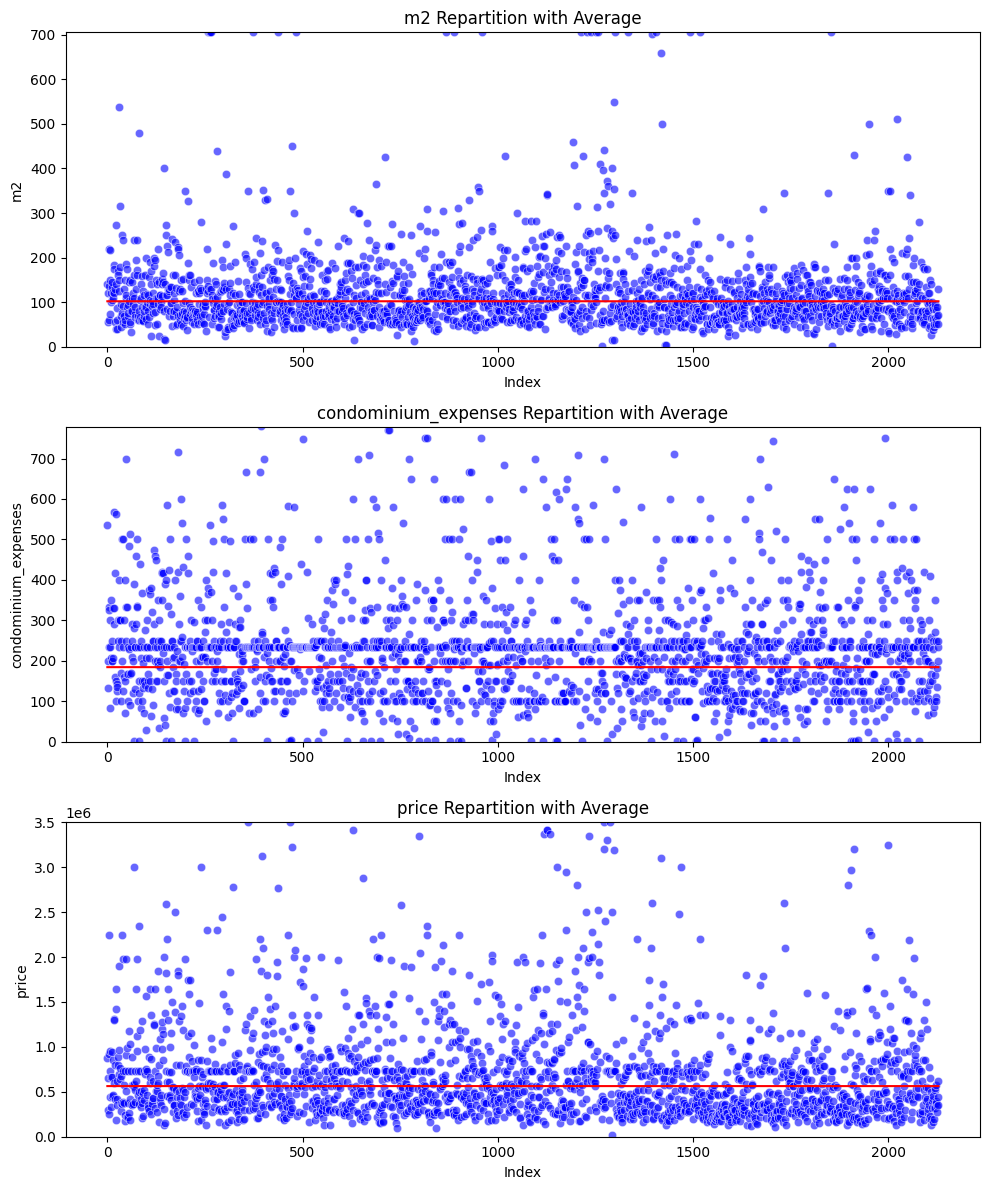

In [146]:
c = 0
columns = ["m2", "condominium_expenses", "price"]
num_plots = len(columns)


mplt.figure(figsize=(10, 12))  # Create one figure with adequate size

for i in columns:
    c += 1
    avg = stat.geometric_mean(data[i])
    #We limit the number plot to the 99th quantile to make it more visualy comprehensible
    extr_value = data[i].quantile(0.99)
    mplt.subplot(num_plots, 1, c)
    sns.scatterplot(x=range(len(data)), y=data[i], color="blue", alpha=0.6)
    sns.lineplot(x=range(len(data)), y=[avg]*len(data), color="red")
    mplt.title(f"{i} Repartition with Average")
    mplt.ylabel(i)
    mplt.ylim(0, extr_value)
    mplt.xlabel("Index")

mplt.tight_layout()  # Adjust subplots to fit in figure area.
mplt.show()



Repartition of the categorical variable   

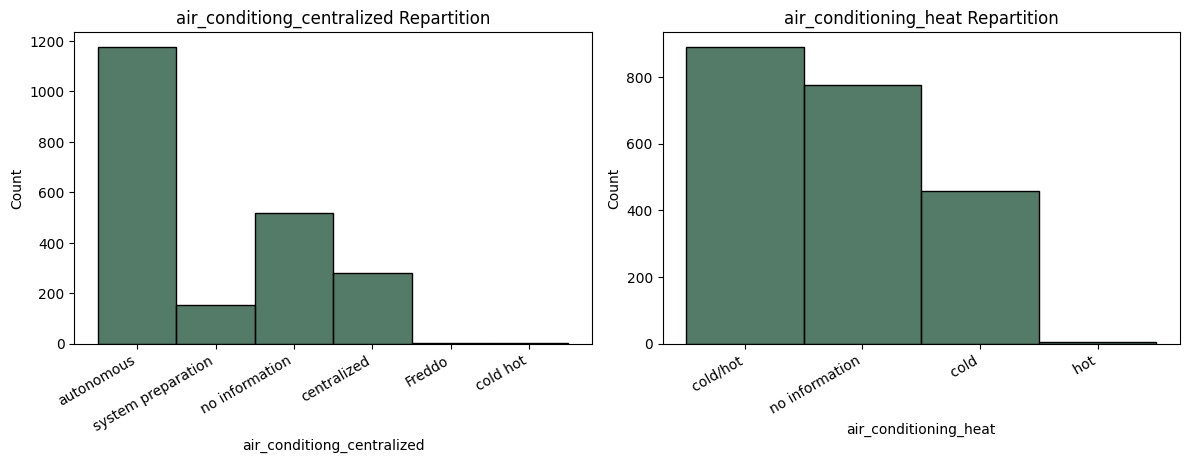

In [147]:
c = 0
columns = ["air_conditiong_centralized", "air_conditioning_heat"]
num_plots = len(columns)

sns.color_palette("bright")
mplt.figure(figsize=(12, 8))  # Create one figure with adequate size

for i in columns:
  c += 1

  mplt.subplot(num_plots, 2, c)
  sns.histplot(data[i], multiple="stack", color="#1b4d35")
  mplt.title(f"{i} Repartition")
  mplt.xticks(rotation=30, ha='right')
  mplt.xlabel(i)


mplt.tight_layout()# Adjust subplots to fit in figure area.
mplt.show()


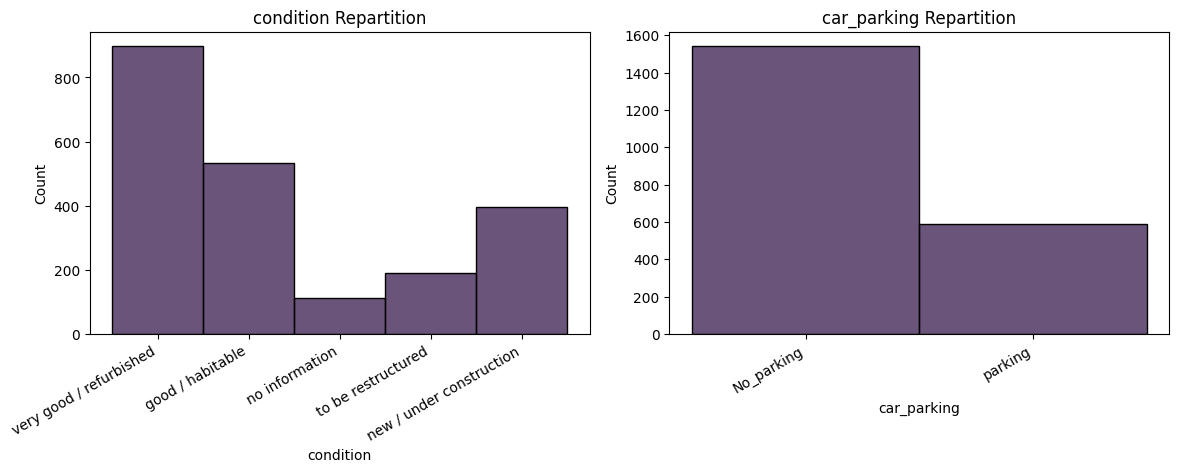

In [148]:
c = 0
columns = ["condition","car_parking"]
num_plots = len(columns)


mplt.figure(figsize=(12, 8))  # Create one figure with adequate size

for i in columns:
  c += 1
  mplt.subplot(num_plots, 2, c)
  sns.histplot(data[i], color="#391b4d")
  mplt.title(f"{i} Repartition")
  mplt.xticks(rotation=30, ha='right')
  mplt.xlabel(i)


mplt.tight_layout()# Adjust subplots to fit in figure area.
mplt.show()


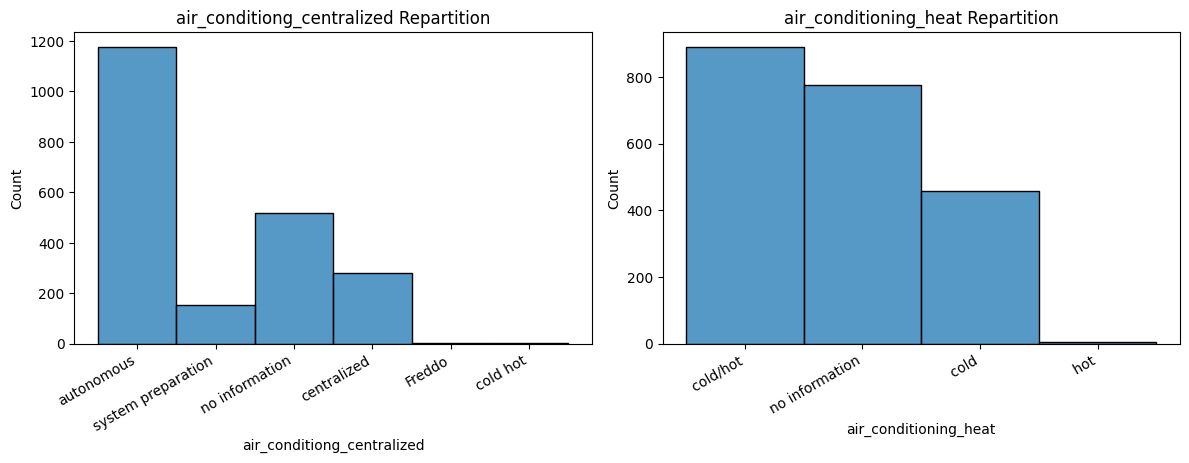

In [149]:
c = 0
columns = ["air_conditiong_centralized", "air_conditioning_heat"]
num_plots = len(columns)


mplt.figure(figsize=(12, 8))  # Create one figure with adequate size

for i in columns:
  c += 1
  mplt.subplot(num_plots, 2, c)
  sns.histplot(data[i])
  mplt.title(f"{i} Repartition")
  mplt.xticks(rotation=30, ha='right')
  mplt.xlabel(i)


mplt.tight_layout()# Adjust subplots to fit in figure area.
mplt.show()


Relation between:
- Price and number of rooms

In [150]:
csv = data.to_csv("data.csv", index=False)

In [151]:
for i in data.rooms:
  if not str(i):
    print(i)

###Relation between the size of the room and the price

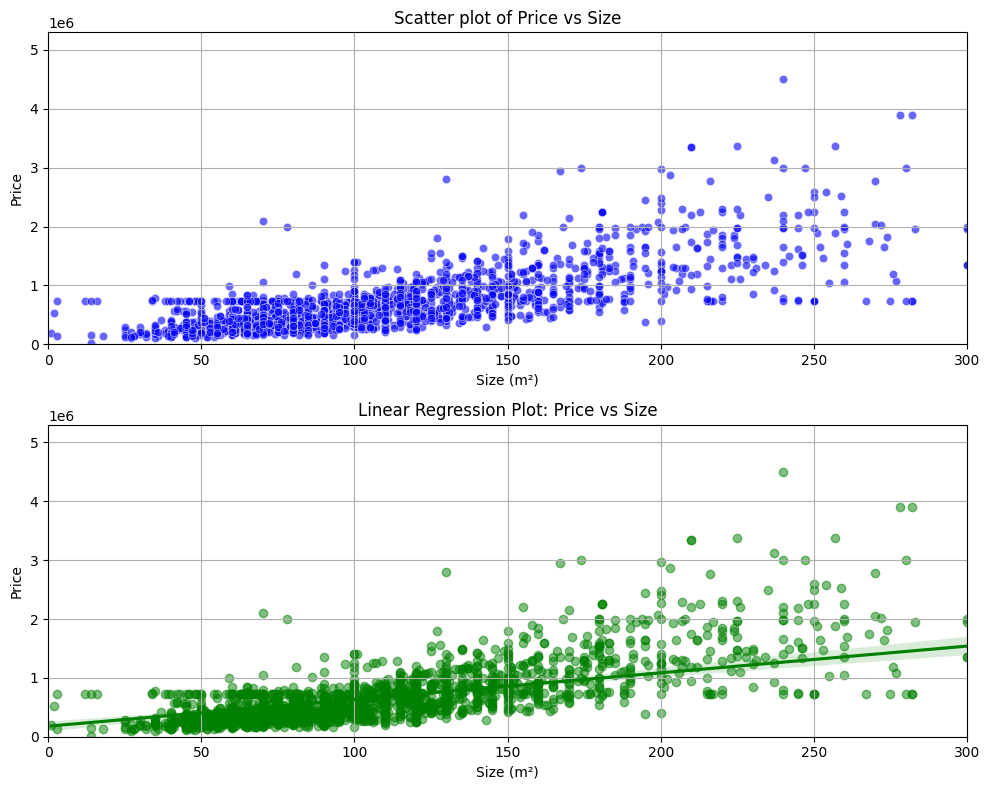

In [152]:
# Set up subplots
mplt.figure(figsize=(10, 8))

# Scatter plot
mplt.subplot(2, 1, 1)
sns.scatterplot(x=data.m2, y=data.price, color='blue', alpha=0.6)
mplt.xlabel('Size (m²)')
mplt.ylabel('Price')
mplt.xlim(0,300)
mplt.ylim(0,max(data.price))
mplt.title('Scatter plot of Price vs Size')
mplt.grid(True)

# Linear regression plot
mplt.subplot(2, 1, 2)
sns.regplot(x="m2", y="price", data=data, color='green', scatter_kws={'alpha':0.5})
mplt.xlabel('Size (m²)')
mplt.ylabel('Price')
mplt.xlim(0,300)
mplt.ylim(0,max(data.price))
mplt.title('Linear Regression Plot: Price vs Size')
mplt.grid(True)

# Adjust layout and display
mplt.tight_layout()
mplt.show()

###Relation between the size of the room and the condominium expenses

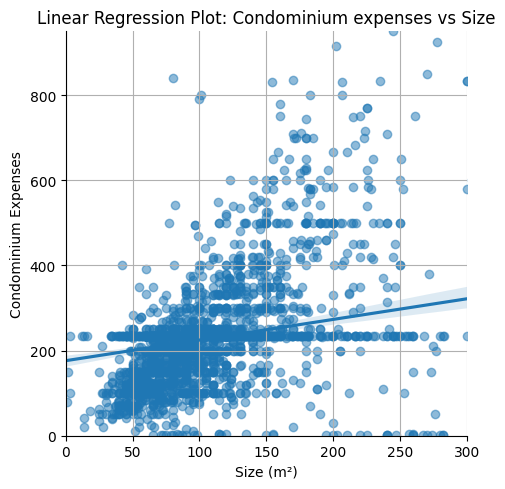

In [159]:
# Linear regression plot

sns.lmplot(x="m2", y="condominium_expenses", data=data, scatter_kws={'alpha':0.5})
mplt.xlabel('Size (m²)')
mplt.ylabel('Condominium Expenses')
mplt.xlim(0,300)
mplt.ylim(0,max(data.condominium_expenses))
mplt.title('Linear Regression Plot: Condominium expenses vs Size')
mplt.grid(True)

# Adjust layout and display
mplt.tight_layout()
mplt.show()

###How does car parking affect the price and the condominium expenses

---



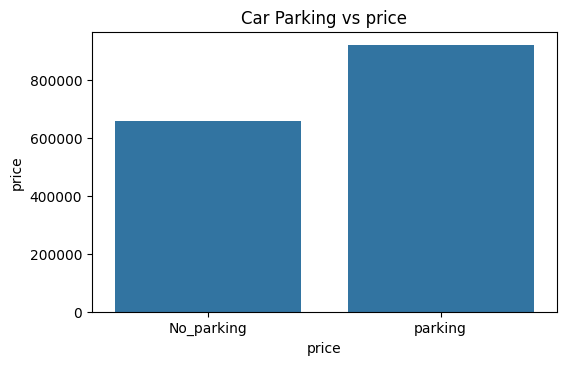

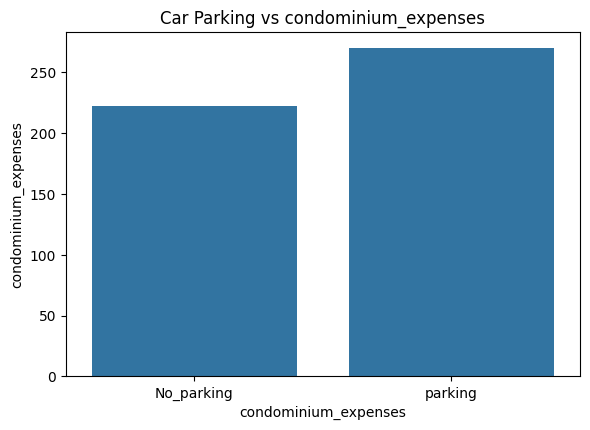

In [154]:
Col = ["price", "condominium_expenses"]
c = 1
for col in Col:
  mplt.figure(figsize=(6,8))
  mplt.subplot(2,1,c)

  summary = data.groupby('car_parking')[col].mean()
  sns.barplot(summary)
  mplt.title("Car Parking vs {}".format(col))
  mplt.xlabel(col)
  c = c+1

# Adjust layout and display
mplt.tight_layout()
mplt.show()

###Relation between the condition and the Price

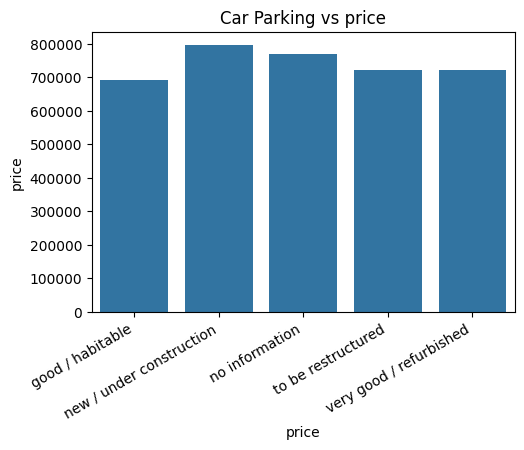

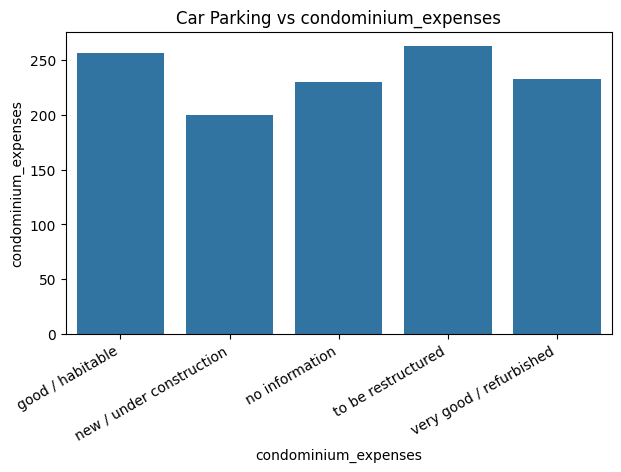

In [155]:
Col = ["price", "condominium_expenses"]
c = 1
for col in Col:

  mplt.figure(figsize=(12,8))
  mplt.subplot(2,2,c)
  summary = data.groupby('condition')[col].mean()
  sns.barplot(summary)
  mplt.title("Car Parking vs {}".format(col))
  mplt.xticks(rotation=30, ha='right')
  mplt.xlabel(col)
  c += 1

# Adjust layout and display
mplt.tight_layout()
mplt.show()